Inspired in a notebook by 

Francisco A. Rodrigues, University of São Paulo. http://conteudo.icmc.usp.br/pessoas/francisco


# Introduction to Networkx

In [7]:
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.1)
G.add_edge('a', 'c', weight=0.5)
G.add_edge('b', 'c', weight=0.3)
G.add_edge('a', 'd', weight=0.9)

In [10]:
import matplotlib.pyplot as pltb

In [14]:
labels = G.nodes()
labels

NodeView(('a', 'b', 'c', 'd'))

/home/gmelodie/Complex-Networks/complexn/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


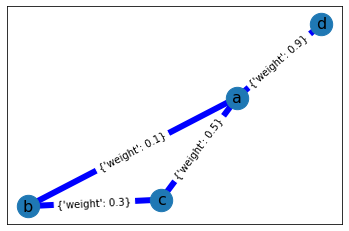

In [15]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, nodecolor='r', edge_color='b',
                node_size=500, font_size=16, pos=pos, width=6)
nx.draw_networkx_edge_labels(G,pos)
plt.show(True)

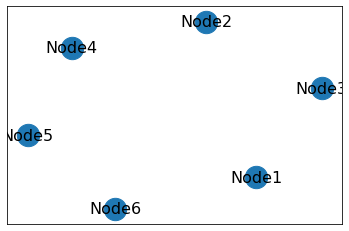

In [19]:
G1 = nx.Graph()
G1.add_node('Node1')
G1.add_node('Node2')
G1.add_node('Node3')
G1.add_node('Node4')
G1.add_node('Node5')
G1.add_node('Node6')

nx.draw_networkx(G1, with_labels = True, node_size=500, font_size=16)
plt.show(True)

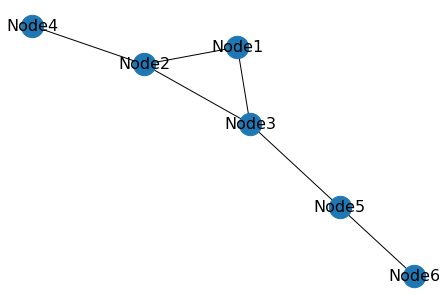

In [23]:
G1.add_edge('Node1','Node2')
G1.add_edge('Node2','Node3')
G1.add_edge('Node1','Node3')
G1.add_edge('Node2','Node4')
G1.add_edge('Node3','Node5')
G1.add_edge('Node5','Node6')

pos=nx.spring_layout(G1)
nx.draw(G1, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

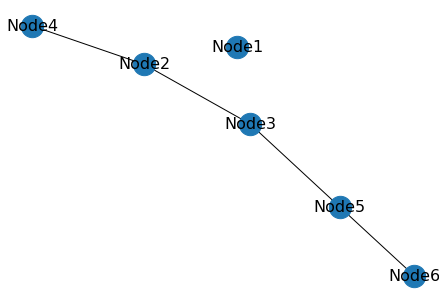

In [24]:
G1.remove_edge('Node1', 'Node2')
G1.remove_edge('Node1', 'Node3')

nx.draw(G1, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

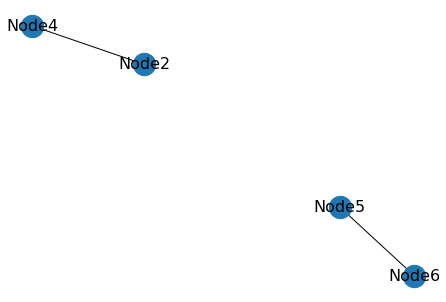

In [25]:
G1.remove_node('Node1')
G1.remove_node('Node3')

nx.draw(G1, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

In [40]:
G1.add_node(1, time='5pm')
print(G1.node[1])
print(G1.node[1]['time'])
print(G1.node)

{'time': '5pm'}
5pm
['Node2', 'Node4', 'Node5', 'Node6', 1, 'Node7']


### Nx only stores the notes that have attributes

In [41]:
# print(G1.node['Node1']) # error (no attributes)
G1.add_node('Node7', bananas=6)
print(G1.node['Node7'])

{'bananas': 6}


### Iteration over nodes

In [43]:
for node in G1.nodes():
    print(node)

Node2
Node4
Node5
Node6
1
Node7


In [45]:
for node in G1.node:
    print(node)

Node2
Node4
Node5
Node6
1
Node7


### Convert labels to integer numbers

In [47]:
G1_int = nx.convert_node_labels_to_integers(G1, first_label=0)
for node in G1_int.nodes():
    print(node)

0
1
2
3
4
5


### Access edges' attributes

In [49]:
for edge in G1.edges(data=True):
    print(edge)

('Node2', 'Node4', {})
('Node5', 'Node6', {})


In [50]:
G1.add_edge(3, 0, blabla='heloooow')
for edge in G1.edges(data=True):
    print(edge)

('Node2', 'Node4', {})
('Node5', 'Node6', {})
(3, 0, {'blabla': 'heloooow'})


### Ex: Normalizing edges

Let us create a simple (weighted) graph to work with

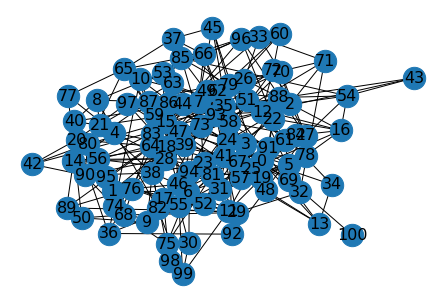

In [56]:
G2 = nx.Graph()

import random

for i in range(100):
    G2.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    G2.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    G2.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    
pos2=nx.spring_layout(G2)
nx.draw(G2, with_labels = True, node_size=500, font_size=16, pos=pos2)
plt.show(True)

Now on to normalizing it: remove edges with weight minor to, let's say, 4

In [69]:
removal_lst = []

for i, edge in enumerate(G2.edges(data=True)):
    print(edge)
    if edge[2]['weight'] <= 4:
        removal_lst.append((edge[0], edge[1]))
        print('Will remove edge ', i, 'with weight ', edge[2]['weight'])
        
for i in removal_lst:
    G2.remove_edge(i[0], i[1])

(55, 30, {'weight': 6})
(55, 38, {'weight': 9})
(55, 45, {'weight': 0})
Will remove edge  2 with weight  0
(55, 52, {'weight': 3})
Will remove edge  3 with weight  3
(55, 76, {'weight': 10})
(55, 81, {'weight': 9})
(28, 21, {'weight': 4})
Will remove edge  6 with weight  4
(28, 63, {'weight': 4})
Will remove edge  7 with weight  4
(28, 14, {'weight': 2})
Will remove edge  8 with weight  2
(28, 57, {'weight': 9})
(28, 56, {'weight': 9})
(28, 87, {'weight': 5})
(28, 90, {'weight': 7})
(28, 94, {'weight': 8})
(27, 25, {'weight': 8})
(27, 91, {'weight': 1})
Will remove edge  15 with weight  1
(27, 48, {'weight': 4})
Will remove edge  16 with weight  4
(27, 54, {'weight': 6})
(27, 70, {'weight': 4})
Will remove edge  18 with weight  4
(27, 72, {'weight': 1})
Will remove edge  19 with weight  1
(27, 78, {'weight': 9})
(27, 96, {'weight': 0})
Will remove edge  21 with weight  0
(1, 80, {'weight': 5})
(1, 1, {'weight': 8})
(1, 6, {'weight': 6})
(1, 18, {'weight': 3})
Will remove edge  25 with 

Now instead of remove the nodes minor or equal to 4, let us just create a subset with them and show it in other colors

In [82]:
G3 = nx.Graph()

import random

for i in range(100):
    G3.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    G3.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    G3.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))


In [83]:
less_eq_four = []

for i, edge in enumerate(G3.edges(data=True)):
    print(edge)
    if edge[2]['weight'] <= 4:
        less_eq_four.append(edge[0])
        less_eq_four.append(edge[1])
        print('Will paint edge ', i, 'with weight ', edge[2]['weight'])
    
print()
print()
print(less_eq_four)

(0, 4, {'weight': 3})
Will paint edge  0 with weight  3
(0, 10, {'weight': 9})
(0, 29, {'weight': 8})
(0, 34, {'weight': 9})
(0, 38, {'weight': 1})
Will paint edge  4 with weight  1
(0, 80, {'weight': 10})
(0, 87, {'weight': 2})
Will paint edge  6 with weight  2
(4, 1, {'weight': 0})
Will paint edge  7 with weight  0
(4, 17, {'weight': 0})
Will paint edge  8 with weight  0
(4, 65, {'weight': 10})
(4, 10, {'weight': 0})
Will paint edge  10 with weight  0
(4, 18, {'weight': 5})
(4, 49, {'weight': 6})
(4, 58, {'weight': 6})
(4, 94, {'weight': 3})
Will paint edge  14 with weight  3
(10, 7, {'weight': 6})
(10, 8, {'weight': 1})
Will paint edge  16 with weight  1
(10, 2, {'weight': 10})
(10, 99, {'weight': 2})
Will paint edge  18 with weight  2
(10, 26, {'weight': 7})
(10, 67, {'weight': 0})
Will paint edge  20 with weight  0
(10, 72, {'weight': 8})
(29, 8, {'weight': 9})
(29, 31, {'weight': 0})
Will paint edge  23 with weight  0
(29, 40, {'weight': 2})
Will paint edge  24 with weight  2
(29

Now create the subgraph

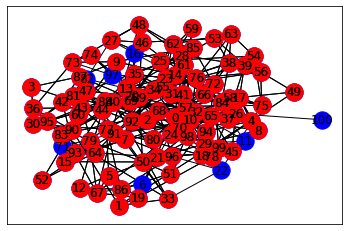

In [86]:
pos3 = nx.spring_layout(G3)

less_eq_four_subgraph = G3.subgraph(list(set(less_eq_four)))

plt.figure()
nx.draw_networkx(G3, pos=pos3, node_color = 'b')
nx.draw_networkx(less_eq_four_subgraph, pos=pos3, node_color = 'r')
plt.show(True)

### Another interesting, rather cleaver, example: weighted to unweighted graph (not originally mine of course)

In [108]:
G4 = nx.Graph()

import random

for i in range(100):
    G4.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    G4.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))
    G4.add_edge(i, random.randint(0, 100), 
                weight=random.randint(0,10))


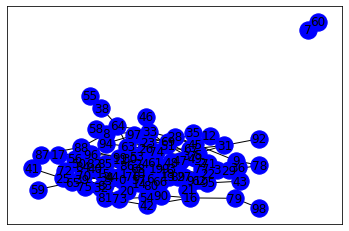

In [114]:
unweighted_G4 = nx.Graph()

minweight = 4

for (node1, node2, attr) in G4.edges(data=True):
    if attr['weight'] > minweight:
        unweighted_G4.add_edge(node1, node2, weight=1)
    
plt.figure()
posu4 = nx.spring_layout(unweighted_G4)
nx.draw_networkx(unweighted_G4, pos=posu4, node_color = 'b')
plt.show(True)

### Graph operations

Joining two graphs

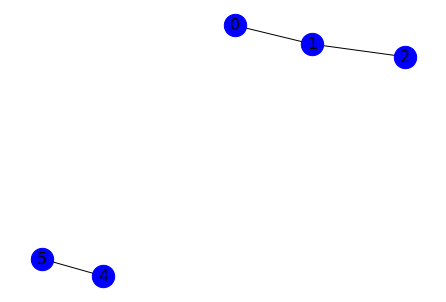

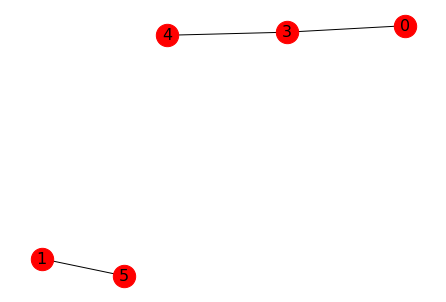

In [94]:
uni1 = nx.Graph([(0, 1), (1, 2), (4, 5)])
uni2 = nx.Graph([(0, 3), (3, 4), (1, 5)])

nx.draw(uni1, with_labels = True, node_size=500, font_size=16, node_color='b')
plt.show(True)

nx.draw(uni2, with_labels = True, node_size=500, font_size=16, node_color='r')
plt.show(True)

### Disjoint union: don't colapse any nodes, just join 2 graphs in one

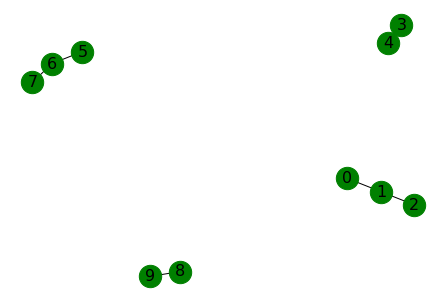

In [96]:
disj = nx.disjoint_union(uni1, uni2)

nx.draw(disj, with_labels = True, node_size=500, font_size=16, node_color='green')
plt.show(True)

### Compose: union considering vertices of same label to be the same

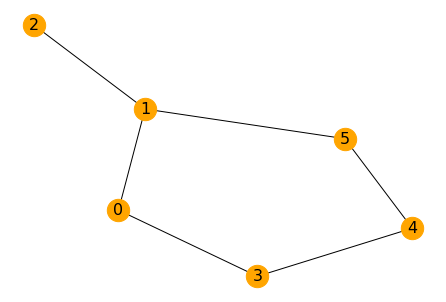

In [98]:
comp = nx.compose(uni1, uni2)

nx.draw(comp, with_labels = True, node_size=500, font_size=16, node_color='orange')
plt.show(True)

### Directed graphs

/home/gmelodie/Complex-Networks/complexn/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


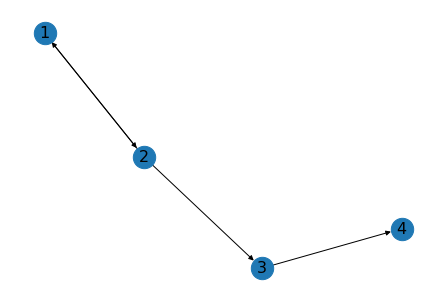

In [100]:
directed = nx.DiGraph([(1,2), (2,3), (3,4), (2,1)])

posDir=nx.spring_layout(directed)
nx.draw(directed, with_labels = True, node_size=500, font_size=16, pos = posDir)
plt.show(True)

### Converting: directed to undirected

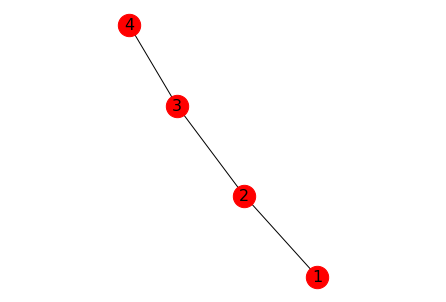

In [104]:
undirected = directed.to_undirected()

posUnd=nx.spring_layout(undirected)
nx.draw(undirected, with_labels = True, node_size=500, font_size=16, pos = posUnd, node_color='red')
plt.show(True)

### Converting: undirected to directed

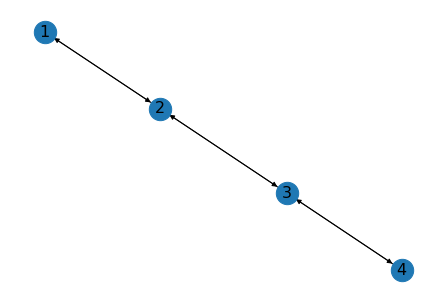

In [106]:
directed2 = undirected.to_directed()

posDir2=nx.spring_layout(directed2)
nx.draw(directed2, with_labels = True, node_size=500, font_size=16, pos = posDir2)
plt.show(True)

### Reading and Writing graphs to files

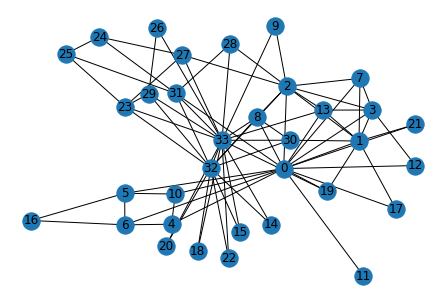

In [116]:
G=nx.karate_club_graph()
nx.draw(G, with_labels = True)
plt.show(True)

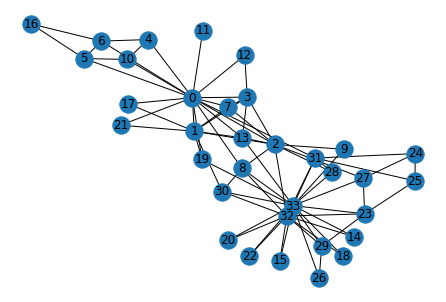

In [119]:
# Writing to file
nx.write_edgelist(G, 'zachary.txt')

# Reading from file
Gnew = nx.read_edgelist('zachary.txt')
nx.draw(Gnew, with_labels = True)
plt.show(True)

**Obs:** We can also save other formats (not only edge lists)

### Components (or, for those like me, the islands)

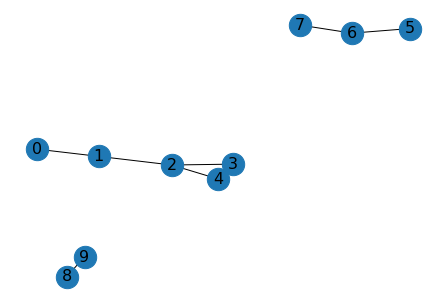

In [122]:
G.clear()
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])
pos = nx.fruchterman_reingold_layout(G);
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

In [125]:
Gcomponents = nx.connected_component_subgraphs(G)
for component in Gcomponents:
    print(component.nodes())

[0, 1, 2, 3, 4]
[5, 6, 7]
[8, 9]
